In [1]:
import torch
import json
import h5py
import random
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw

In [2]:
# load the following to files from DETECTED_SGG_DIR
custom_prediction = json.load(open('/home/rafi/checkpoints/sgdet/custom_prediction.json'))
custom_data_info = json.load(open('/home/rafi/checkpoints/sgdet/custom_data_info.json'))

In [3]:
def draw_single_box(pic, box, color='red', draw_info=None):
    draw = ImageDraw.Draw(pic)
    x1,y1,x2,y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])
    draw.rectangle(((x1, y1), (x2, y2)), outline=color)
    if draw_info:
        draw.rectangle(((x1, y1), (x1+50, y1+10)), fill=color)
        info = draw_info
        draw.text((x1, y1), info)
        
def print_list(name, input_list, scores=None):
    for i, item in enumerate(input_list):
        if scores == None:
            print(name + ' ' + str(i) + ': ' + str(item))
        else:
            print(name + ' ' + str(i) + ': ' + str(item) + '; score: ' + str(scores[i]))
    
def draw_image(img_path, boxes, box_labels, rel_labels, box_scores=None, rel_scores=None):
    size = get_size(Image.open(img_path).size)
    pic = Image.open(img_path).resize(size)
    num_obj = len(boxes)
    for i in range(num_obj):
        info = str(i) + '_' + box_labels[i]
        draw_single_box(pic, boxes[i], draw_info=info)
    display(pic)
    print('*' * 50)
    print_list('box_labels', box_labels, box_scores)
    print('*' * 50)
    print_list('rel_labels', rel_labels, rel_scores)
    
    return None

def get_size(image_size):
    min_size = 600
    max_size = 1000
    w, h = image_size
    size = min_size
    if max_size is not None:
        min_original_size = float(min((w, h)))
        max_original_size = float(max((w, h)))
        if max_original_size / min_original_size * size > max_size:
            size = int(round(max_size * min_original_size / max_original_size))
    if (w <= h and w == size) or (h <= w and h == size):
        return (w, h)
    if w < h:
        ow = size
        oh = int(size * h / w)
    else:
        oh = size
        ow = int(size * w / h)
    return (ow, oh)

In [4]:
# parameters
image_idx = 0
box_topk = 30 # select top k bounding boxes
rel_topk = 20 # select top k relationships
ind_to_classes = custom_data_info['ind_to_classes']
ind_to_predicates = custom_data_info['ind_to_predicates']

## Lists of Predicates and Objects

In [7]:

custom_data_info.keys()

dict_keys(['idx_to_files', 'ind_to_classes', 'ind_to_predicates'])

In [8]:
def show_image_with_boxes(image_idx, ind_to_classes, ind_to_predicates ,box_topk=30, rel_topk=20):

    image_path = custom_data_info['idx_to_files'][image_idx]
    boxes = custom_prediction[str(image_idx)]['bbox'][:box_topk]
    box_labels = custom_prediction[str(image_idx)]['bbox_labels'][:box_topk]
    box_scores = custom_prediction[str(image_idx)]['bbox_scores'][:box_topk]
    all_rel_labels = custom_prediction[str(image_idx)]['rel_labels']
    all_rel_scores = custom_prediction[str(image_idx)]['rel_scores']
    all_rel_pairs = custom_prediction[str(image_idx)]['rel_pairs']

    for i in range(len(box_labels)):
        box_labels[i] = ind_to_classes[box_labels[i]]

    rel_labels = []
    rel_scores = []
    for i in range(len(all_rel_pairs)):
        if all_rel_pairs[i][0] < box_topk and all_rel_pairs[i][1] < box_topk:
            rel_scores.append(all_rel_scores[i])
            label = str(all_rel_pairs[i][0]) + '_' + box_labels[all_rel_pairs[i][0]] + ' => ' + ind_to_predicates[all_rel_labels[i]] + ' => ' + str(all_rel_pairs[i][1]) + '_' + box_labels[all_rel_pairs[i][1]]
            rel_labels.append(label)

    rel_labels = rel_labels[:rel_topk]
    rel_scores = rel_scores[:rel_topk]

    draw_image(image_path, boxes, box_labels, rel_labels, box_scores=box_scores, rel_scores=rel_scores)

File: /home/rafi/checkpoints/sgg_custom_image/surf.jpg


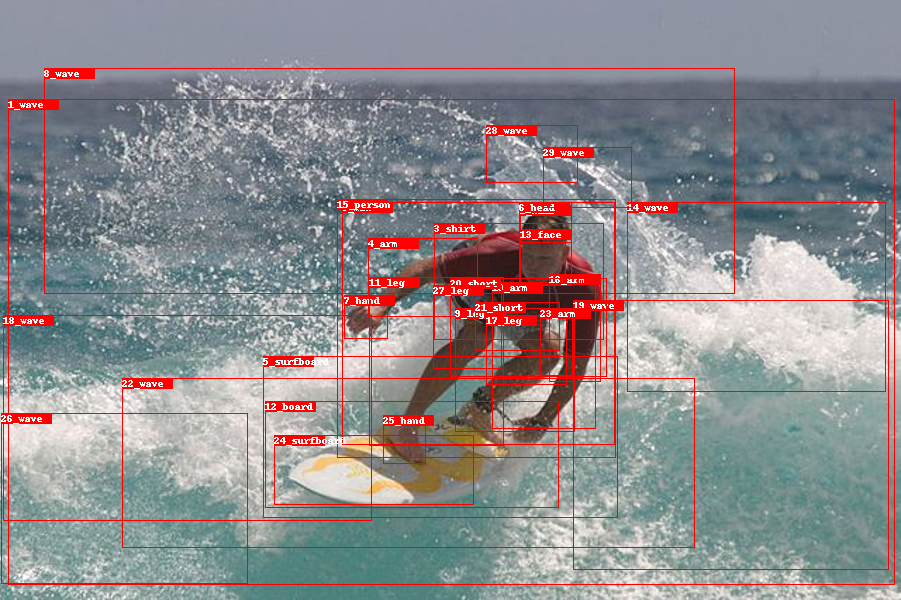

**************************************************
box_labels 0: man; score: 0.774276614189148
box_labels 1: wave; score: 0.6608366966247559
box_labels 2: hair; score: 0.6095278859138489
box_labels 3: shirt; score: 0.5431077480316162
box_labels 4: arm; score: 0.4368588924407959
box_labels 5: surfboard; score: 0.4080859422683716
box_labels 6: head; score: 0.34068694710731506
box_labels 7: hand; score: 0.323851615190506
box_labels 8: wave; score: 0.24084848165512085
box_labels 9: leg; score: 0.2362680733203888
box_labels 10: arm; score: 0.21561577916145325
box_labels 11: leg; score: 0.21259072422981262
box_labels 12: board; score: 0.16833285987377167
box_labels 13: face; score: 0.08166076242923737
box_labels 14: wave; score: 0.07038182020187378
box_labels 15: person; score: 0.06165751442313194
box_labels 16: arm; score: 0.03731955587863922
box_labels 17: leg; score: 0.034017328172922134
box_labels 18: wave; score: 0.027157317847013474
box_labels 19: wave; score: 0.026945747435092926
box_

In [21]:

for i,f in enumerate(custom_data_info['idx_to_files']):
    print("File:",f)
    show_image_with_boxes(i, ind_to_classes, ind_to_predicates)
    

File: /home/rafi/checkpoints/sgg_custom_image/ADE_val_00000257.jpg


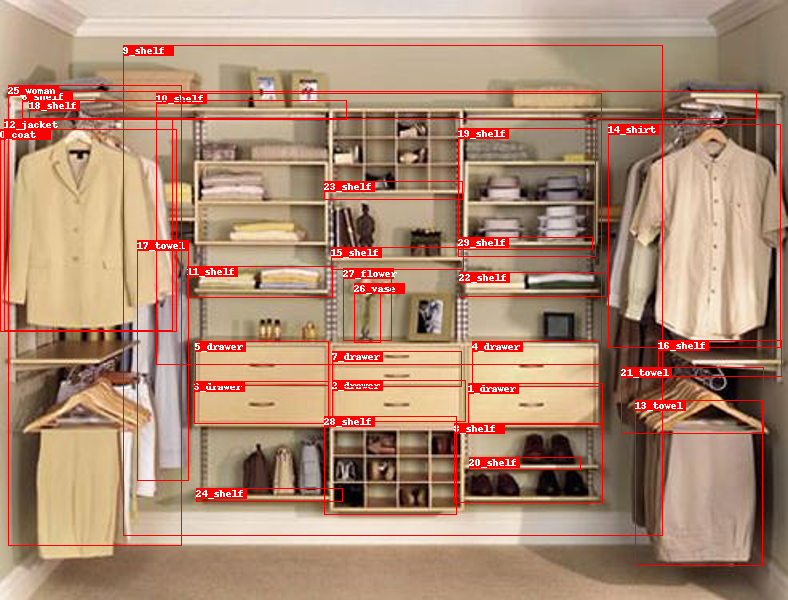

**************************************************
box_labels 0: coat; score: 0.6391841173171997
box_labels 1: drawer; score: 0.575282871723175
box_labels 2: drawer; score: 0.5623289942741394
box_labels 3: drawer; score: 0.5189666748046875
box_labels 4: drawer; score: 0.5160244703292847
box_labels 5: drawer; score: 0.4813552498817444
box_labels 6: shelf; score: 0.3903621733188629
box_labels 7: drawer; score: 0.3901088535785675
box_labels 8: shelf; score: 0.3728693425655365
box_labels 9: shelf; score: 0.256958544254303
box_labels 10: shelf; score: 0.2567392587661743
box_labels 11: shelf; score: 0.23991701006889343
box_labels 12: jacket; score: 0.20746226608753204
box_labels 13: towel; score: 0.19871225953102112
box_labels 14: shirt; score: 0.17935387790203094
box_labels 15: shelf; score: 0.17756876349449158
box_labels 16: shelf; score: 0.16842027008533478
box_labels 17: towel; score: 0.15453173220157623
box_labels 18: shelf; score: 0.14772018790245056
box_labels 19: shelf; score: 0.1476

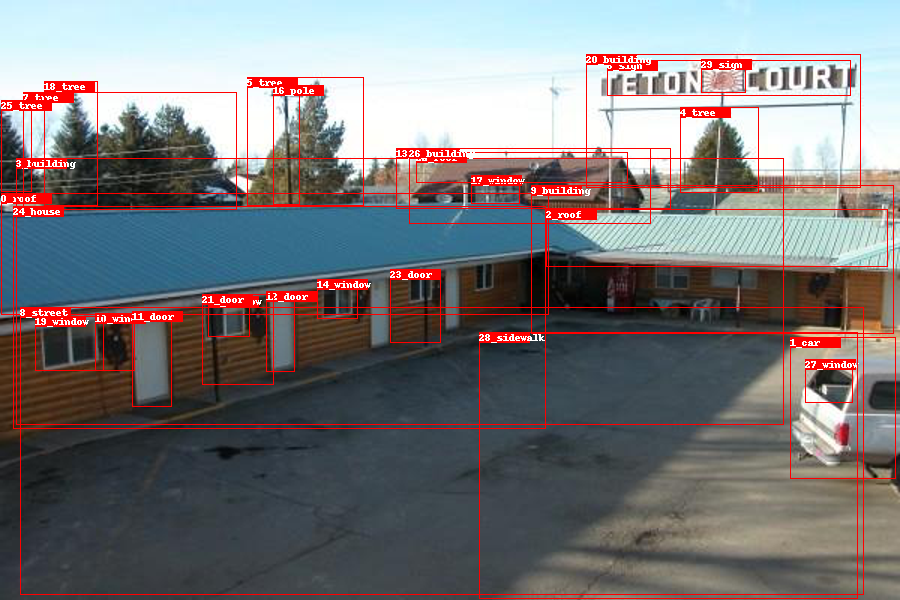

**************************************************
box_labels 0: roof; score: 0.6268101930618286
box_labels 1: car; score: 0.5597708821296692
box_labels 2: roof; score: 0.5581608414649963
box_labels 3: building; score: 0.40878626704216003
box_labels 4: tree; score: 0.4062656760215759
box_labels 5: tree; score: 0.40279385447502136
box_labels 6: sign; score: 0.3424294590950012
box_labels 7: tree; score: 0.34194400906562805
box_labels 8: street; score: 0.30318570137023926
box_labels 9: building; score: 0.2993057370185852
box_labels 10: window; score: 0.24489852786064148
box_labels 11: door; score: 0.24207687377929688
box_labels 12: door; score: 0.23829352855682373
box_labels 13: house; score: 0.23184438049793243
box_labels 14: window; score: 0.2250317484140396
box_labels 15: window; score: 0.17747367918491364
box_labels 16: pole; score: 0.169695645570755
box_labels 17: window; score: 0.16428828239440918
box_labels 18: tree; score: 0.1640767902135849
box_labels 19: window; score: 0.1621582

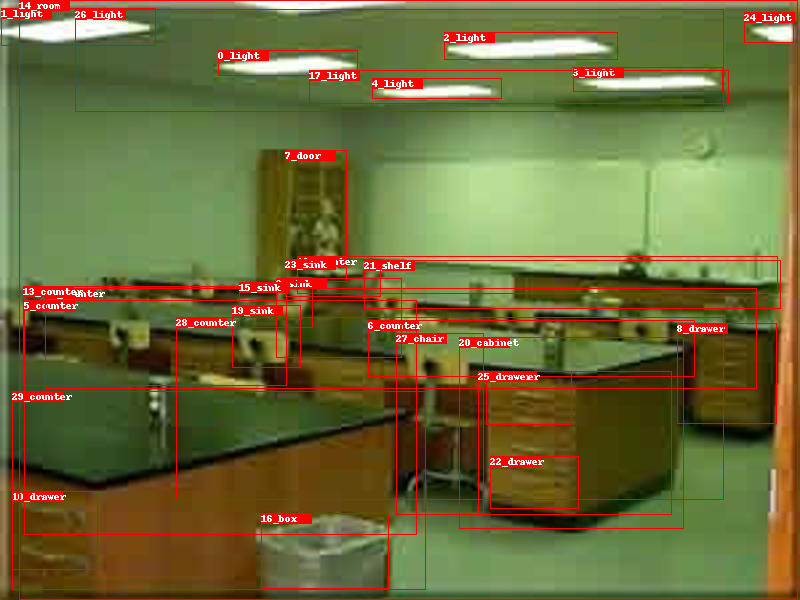

**************************************************
box_labels 0: light; score: 0.4955202043056488
box_labels 1: light; score: 0.4456794857978821
box_labels 2: light; score: 0.44504496455192566
box_labels 3: light; score: 0.43687862157821655
box_labels 4: light; score: 0.42884746193885803
box_labels 5: counter; score: 0.3850770890712738
box_labels 6: counter; score: 0.2971545457839966
box_labels 7: door; score: 0.23265300691127777
box_labels 8: drawer; score: 0.2316192090511322
box_labels 9: sink; score: 0.22541427612304688
box_labels 10: drawer; score: 0.18919162452220917
box_labels 11: drawer; score: 0.15752293169498444
box_labels 12: counter; score: 0.1525408923625946
box_labels 13: counter; score: 0.14971837401390076
box_labels 14: room; score: 0.14897550642490387
box_labels 15: sink; score: 0.12940596044063568
box_labels 16: box; score: 0.11737263947725296
box_labels 17: light; score: 0.11347578465938568
box_labels 18: counter; score: 0.11274637281894684
box_labels 19: sink; score:

In [8]:

for i,f in enumerate(custom_data_info['idx_to_files']):
    print("File:",f)
    show_image_with_boxes(i, ind_to_classes, ind_to_predicates)

File: /home/rafi/checkpoints/sgg_custom_image/ADE_val_00000728.jpg


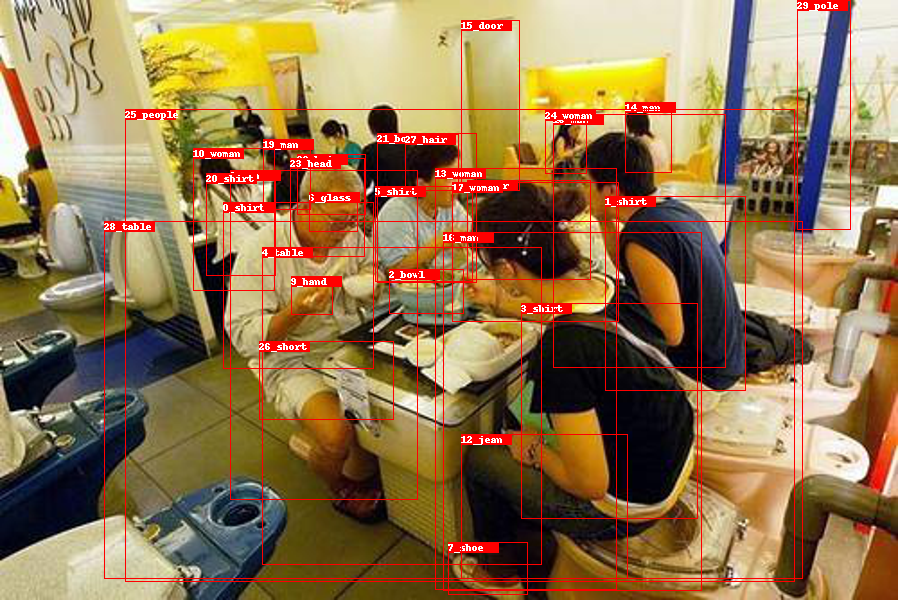

**************************************************
box_labels 0: shirt; score: 0.606284499168396
box_labels 1: shirt; score: 0.6062800288200378
box_labels 2: bowl; score: 0.5189520120620728
box_labels 3: shirt; score: 0.508006751537323
box_labels 4: table; score: 0.3897896707057953
box_labels 5: shirt; score: 0.3635421097278595
box_labels 6: glass; score: 0.3466576337814331
box_labels 7: shoe; score: 0.3219117224216461
box_labels 8: man; score: 0.2979936897754669
box_labels 9: hand; score: 0.263135701417923
box_labels 10: woman; score: 0.25841525197029114
box_labels 11: hair; score: 0.2582959830760956
box_labels 12: jean; score: 0.25655943155288696
box_labels 13: woman; score: 0.2369019091129303
box_labels 14: man; score: 0.1973027139902115
box_labels 15: door; score: 0.18567344546318054
box_labels 16: man; score: 0.18193233013153076
box_labels 17: woman; score: 0.17523795366287231
box_labels 18: man; score: 0.16081546247005463
box_labels 19: man; score: 0.16017284989356995
box_labels 

In [7]:

for i,f in enumerate(custom_data_info['idx_to_files']):
    print("File:",f)
    show_image_with_boxes(i, ind_to_classes, ind_to_predicates)

File: /home/rafi/checkpoints/sgg_custom_image/1001.jpg


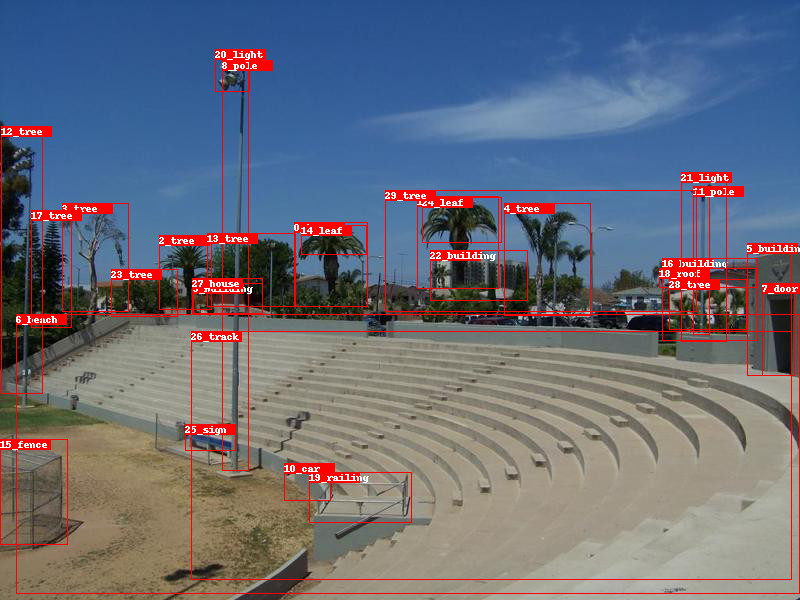

**************************************************
box_labels 0: tree; score: 0.482377290725708
box_labels 1: tree; score: 0.46114808320999146
box_labels 2: tree; score: 0.41793468594551086
box_labels 3: tree; score: 0.39988163113594055
box_labels 4: tree; score: 0.3761277198791504
box_labels 5: building; score: 0.33120012283325195
box_labels 6: beach; score: 0.31884223222732544
box_labels 7: door; score: 0.29285845160484314
box_labels 8: pole; score: 0.23426823318004608
box_labels 9: building; score: 0.2115553319454193
box_labels 10: car; score: 0.2085725963115692
box_labels 11: pole; score: 0.17855244874954224
box_labels 12: tree; score: 0.1657654047012329
box_labels 13: tree; score: 0.12705275416374207
box_labels 14: leaf; score: 0.12461356073617935
box_labels 15: fence; score: 0.11786656826734543
box_labels 16: building; score: 0.10728435963392258
box_labels 17: tree; score: 0.0802459865808487
box_labels 18: roof; score: 0.08017472922801971
box_labels 19: railing; score: 0.07338815

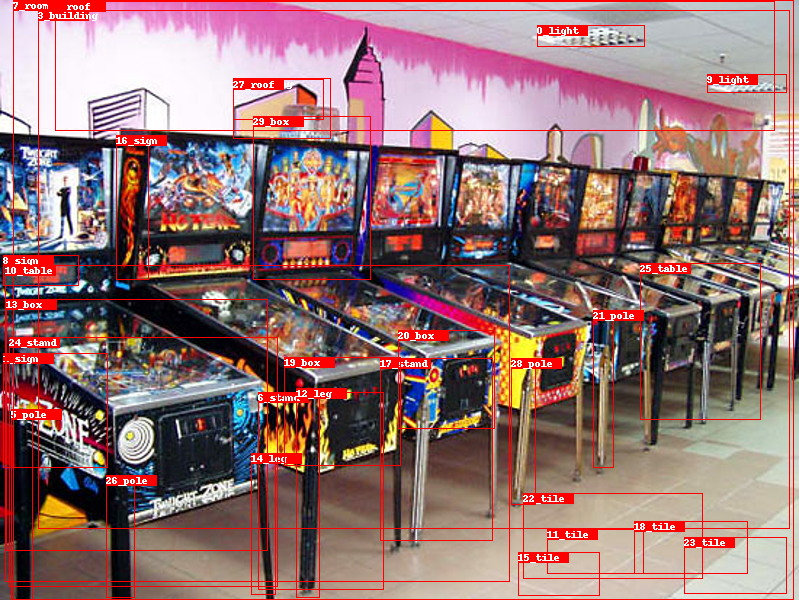

**************************************************
box_labels 0: light; score: 0.42008623480796814
box_labels 1: sign; score: 0.19693781435489655
box_labels 2: roof; score: 0.1935759335756302
box_labels 3: building; score: 0.18092402815818787
box_labels 4: building; score: 0.14535923302173615
box_labels 5: pole; score: 0.08381565660238266
box_labels 6: stand; score: 0.0810183510184288
box_labels 7: room; score: 0.07635550945997238
box_labels 8: sign; score: 0.06628457456827164
box_labels 9: light; score: 0.06391438096761703
box_labels 10: table; score: 0.05810841545462608
box_labels 11: tile; score: 0.0562138594686985
box_labels 12: leg; score: 0.0536087267100811
box_labels 13: box; score: 0.049645211547613144
box_labels 14: leg; score: 0.044748011976480484
box_labels 15: tile; score: 0.04145417734980583
box_labels 16: sign; score: 0.040279366075992584
box_labels 17: stand; score: 0.039926912635564804
box_labels 18: tile; score: 0.03845462203025818
box_labels 19: box; score: 0.03764207

In [9]:

for i,f in enumerate(custom_data_info['idx_to_files']):
    print("File:",f)
    show_image_with_boxes(i, ind_to_classes, ind_to_predicates)